In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Twitter Api Credentials
consumerKey = *****************************
consumerSecret = *************************************
accessToken = ***************************************************
accessTokenSecret = ***********************************************

In [5]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
#defining functions:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

In [7]:
def get_tweets(coin_name,nb_tweet):
    #get the tweets
    df = pd.DataFrame([tweet.text for tweet in tweepy.Cursor(api.search, q='$'+coin_name, rpp=1000).items(nb_tweet)], columns=['Tweets'])
    # Clean the tweets
    df['Tweets'] = df['Tweets'].apply(cleanTxt)
    # Create two new columns 'Subjectivity' & 'Polarity'
    df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
    df['Polarity'] = df['Tweets'].apply(getPolarity)
    df['Analysis'] = df['Polarity'].apply(getAnalysis)
    # Plotting 
    plt.figure(figsize=(8,6)) 
    for i in range(0, df.shape[0]):
      plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
    # plt.scatter(x,y,color)   
    plt.title('Sentiment Analysis') 
    plt.xlabel('Polarity') 
    plt.ylabel('Subjectivity') 
    plt.show()
    # Plotting and visualizing the counts
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind = 'bar')
    plt.show()
    # word cloud visualization
    allWords = ' '.join([twts for twts in df['Tweets']])
    wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


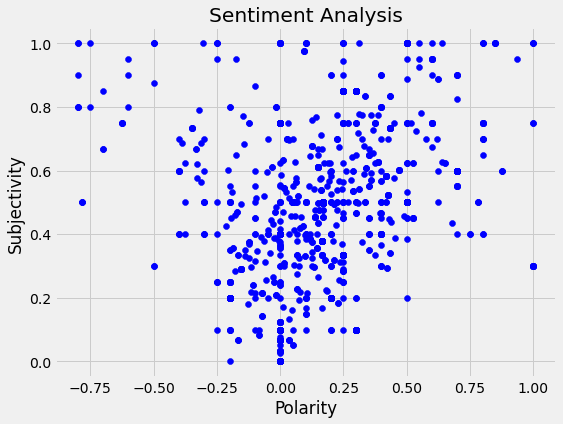

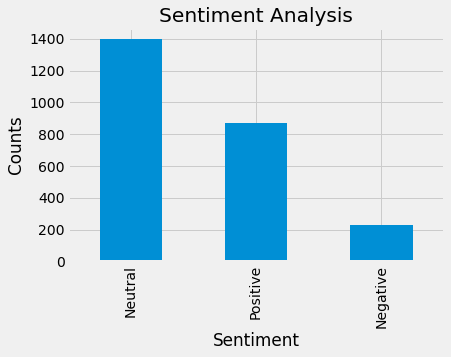

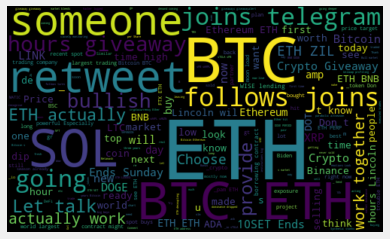

In [8]:
get_tweets("eth",2500)

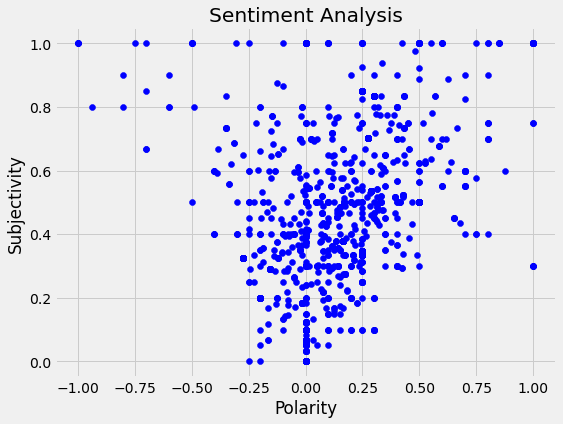

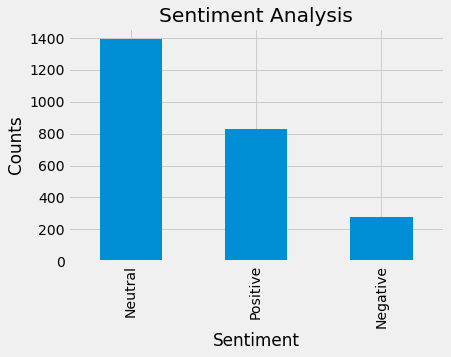

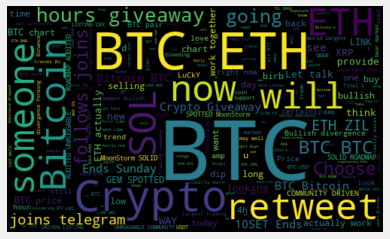

In [9]:
get_tweets('btc',2500)

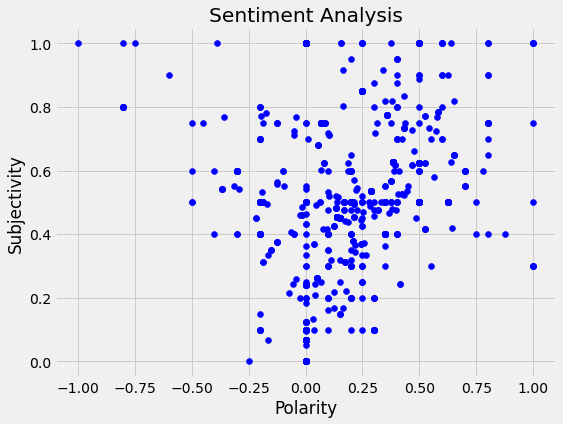

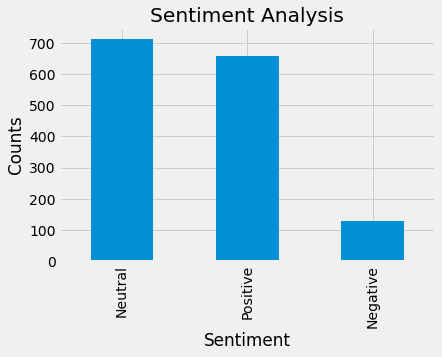

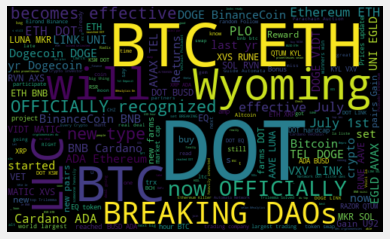

In [10]:
get_tweets('dot',1500)